In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_rainfall = pd.read_csv('generated_data/rainfall.csv')

In [3]:
df_rainfall.ADM2_EN.value_counts()

ADM2_EN
Bagerhat       528
Bandarban      528
Manikganj      528
Maulvibazar    528
Meherpur       528
              ... 
Khulna         528
Kishoreganj    528
Kurigram       528
Kushtia        528
Thakurgaon     528
Name: count, Length: 64, dtype: int64

In [4]:
df_rainfall_dhaka = df_rainfall[df_rainfall.ADM2_EN == 'Dhaka']

In [5]:
df_rainfall_dhaka.head(20)

,date,ADM2_EN,rfh
12,1981-01,Dhaka,4.611133
76,1981-02,Dhaka,10.419733
140,1981-03,Dhaka,38.012333
204,1981-04,Dhaka,137.413567
268,1981-05,Dhaka,107.191333
332,1981-06,Dhaka,69.425933
396,1981-07,Dhaka,156.296300
460,1981-08,Dhaka,78.567933
524,1981-09,Dhaka,85.413600
588,1981-10,Dhaka,17.092600


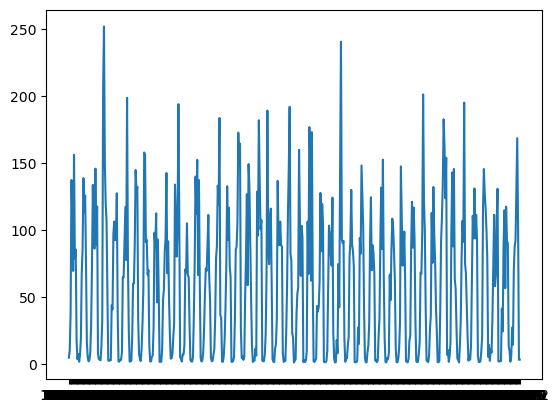

In [6]:
plt.plot(df_rainfall_dhaka.date, df_rainfall_dhaka.rfh)
plt.show()

In [66]:
df_food = pd.read_csv('generated_data/food_pricing.csv')

In [60]:
# df_food.index = pd.to_datetime(df_food.date)

In [68]:
df_food.date = pd.to_datetime(df_food.date).dt.to_period('M')

In [70]:
df_food.head()

,date,location,commodity,unit,price
0,2004-03,Dhaka,Rice (coarse),KG,14.0
1,2004-04,Dhaka,Rice (coarse),KG,14.0
2,2004-08,Dhaka,Rice (coarse),KG,15.0
3,2004-09,Dhaka,Rice (coarse),KG,14.0
4,2004-10,Dhaka,Rice (coarse),KG,15.0


In [78]:
df_rainfall.date = pd.to_datetime(df_rainfall.date).dt.to_period('M')

In [80]:
merged_df = pd.merge(df_food, df_rainfall, left_on=['date', 'location'], right_on=['date', 'ADM2_EN'], how='inner')

In [88]:
merged_df.head()

,date,location,commodity,unit,price,ADM2_EN,rfh
0,2004-03,Dhaka,Rice (coarse),KG,14.0,Dhaka,9.567900
1,2004-04,Dhaka,Rice (coarse),KG,14.0,Dhaka,106.327167
2,2004-08,Dhaka,Rice (coarse),KG,15.0,Dhaka,62.240733
3,2004-09,Dhaka,Rice (coarse),KG,14.0,Dhaka,173.166667
4,2004-10,Dhaka,Rice (coarse),KG,15.0,Dhaka,59.648133


In [90]:
df_final = merged_df[['date', 'location', 'commodity', 'price', 'rfh']]

In [108]:
location_counts = df_final['location'].value_counts()

In [110]:
valid_locations = location_counts[location_counts >= 300].index

In [112]:
len(valid_locations)

6

In [114]:
df_final = df_final[df_final['location'].isin(valid_locations)]

In [116]:
df_final.shape

(3835, 5)

In [118]:
df_final.commodity.value_counts()

commodity
Wheat flour        1233
Lentils (masur)     894
Oil (palm)          886
Rice (coarse)       822
Name: count, dtype: int64

In [120]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3835 entries, 0 to 9839
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   date       3835 non-null   period[M]
 1   location   3835 non-null   object   
 2   commodity  3835 non-null   object   
 3   price      3835 non-null   float64  
 4   rfh        3835 non-null   float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 179.8+ KB
